In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

In [3]:
continuous_update=False
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Differential equations - linear or nonlinear system

This notebook covers various systems defined by the following differential equations:

- nonlinear vibration: $\ddot{x}+0.25\dot{x}+5\sin{x}=F$,
- linear vibration: $\ddot{x}+0.25\dot{x}+5x=F$,
- nonlinear system: $\ddot{x}+0.003\dot{x}x=F$,
- linear time-dependent system: $\ddot{x}-0.2{x}t^{\frac{1}{4}}=F$,
- nonlinear time-dependent system: $\ddot{x}+0.0001x^2t=F$,<br>

where $F$ denotes the input (step function), $t$ time, and $x$ the dependent variable.

The left figure shows time responses for different intial conditions and different inputs. The bold blue curve represents the time response based on the values set by the sliders. The other curves represent time responses obtained from multiples of 1) a value of the first initial condition - displacement $x(0)$, 2) a value of the second initial condition - speed $\dot x(0)$, or 3) a system input (depending on the *What to change* radio button selection). The multiples are integer values ranging from -5 to +5.
<br>

*Example*:
<br>
$\text{input}=0.7$, $x(0)=2.0$, and $\dot x(0)=5.5$, *input* radio button selected.
Outputs: Bold curve is based on the values set above. Other curves are based on the same $x(0)$ and $\dot x(0)$ values, but with the following step amplitudes: 

$0.7\begin{pmatrix}-5& -4& -3& -2& -1& 0& 1& 2& 3& 4& 5\end{pmatrix}=\begin{pmatrix}-3.5& -2.8& -2.1& -1.4& -0.7& 0& 0.7& 1.4& 2.1& 2.8& 3.5\end{pmatrix}$.

The right figure shows the values of all the time responses shown in the left figure at the selected instant of time. The x-axes tick labels denote integer values ranging from -5 to +5. For a linear system the time response is always a line. 

---

### How to use this notebook?

Move the sliders to change the time responses to the selected step amplitude (*input*) or the intial conditions of the pre-defined systems introduced above. You can toggle between different systems by pressing the corresponding toggle button. 

#### Legend:

- *input*: value of the input (step) amplitude.
- *delay*: time delay for the start of integration (for time dependent systems).
- *instant of time*: time at which the responses in right figure are shown.
- $x(0)$: value of the first initial condition - displacement.
- $\dot x(0)$: value of the second initial condition - speed.
<br>

In [4]:
# diferential equations:

def nonlinear_vibr(y,t, x): # y začetni pogoj, t čas, x krmilni vhod
    '''nonlinear vibration'''
    th, om = y
    b=0.25
    c=5.
    dydt = (om, x - b*om - c*np.sin(th))
    return dydt

def linear_vibr(y,t,x):
    '''linear vibration'''
    th, om = y
    b=0.25
    c=5.
    dydt = (om, x - b*om - c*th)
    return dydt

def nonlinear(y,t,x):
    '''nonlinear d.e.'''
    c, v = y
    dydt = (v, x - 0.003*c*v)
    return dydt

def time_dependent(y,t,x):
    '''time dependent d.e.'''
    c, v = y
    dydt = (v, x + .2*c*t**(1/4))
    return dydt

def first_order (y, t, x):
    '''first order nonlinear time dependent d.e.'''
    c, v = y
    dydt = (v, x - .0001*c*c*t)
    return dydt

<IPython.core.display.Javascript object>


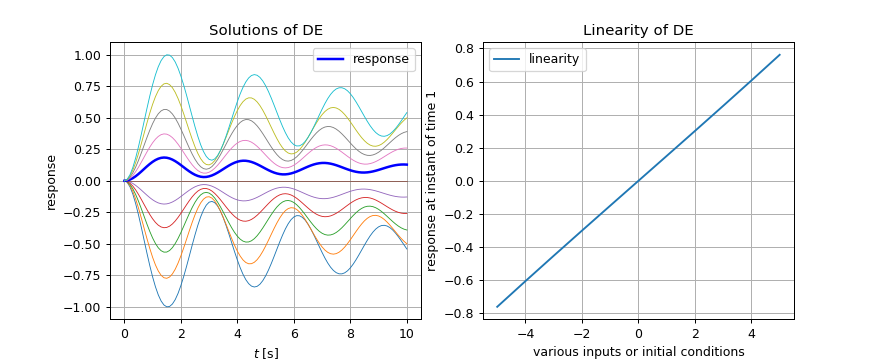

ToggleButtons(description='Select a system:', options=('nonlinear vibration', 'linear vibration', 'nonlinear',…

In [5]:
fig = plt.figure(figsize=(9.8, 4),num="Differential equations (DE)")

response = fig.add_subplot(1, 2, 1)

pnts_of_resp = fig.add_subplot(1, 2, 2)

y0 = np.array([0.,0.]) # init. conditions

t_end = 10

x=1
t_0=1
t_calc=1
y0_0=1
y0_1=1


def func():
    global y0, x, t_0, t_calc, y0_0, y0_1
    y0[0] = y0_0
    y0[1] = y0_1
    t = np.linspace(0,t_end,t_end*10+1) #time points, where response (solution) is calculated
    linearity = [] # point to look, if d.e. is linear on not
    
    t = t+ t_0
    
    plus_minus = 5.
    input_amp = np.round(np.linspace(-plus_minus,plus_minus,2*int(plus_minus)+1))

    response.clear()
    pnts_of_resp.clear()
    
    current_button = buttons.index
    for amp in input_amp:
        if radio_buttons.index == 0:
            i=amp*x
            input_pack = [i, y0]
        if radio_buttons.index == 1:
            i=amp*float(y0[0])
            input_pack = [x, [i, y0[1]]]
        if radio_buttons.index == 2:
            i=amp*float(y0[1])
            input_pack = [x, [y0[0], i]]

        if current_button == 0:
            solution = odeint(nonlinear_vibr, input_pack[1], t, args=(input_pack[0],))
        if current_button == 1:
            solution = odeint(linear_vibr, input_pack[1], t, args=(input_pack[0],))
        if current_button == 2:
            solution = odeint(nonlinear, input_pack[1], t, args=(input_pack[0],))
        if current_button == 3:
            solution = odeint(time_dependent, input_pack[1], t, args=(input_pack[0],))
        if current_button == 4:
            solution = odeint(first_order, input_pack[1], t, args=(input_pack[0],))
            
        solution = solution[:,0]
        linearity.append(solution[int(t_calc*10)])
        
        if amp == 1:
            response.plot(t, solution, 'b', lw=2, label='response')
        else:
            response.plot(t, solution, lw=.7)
        
    response.grid()
    response.set_xlabel('$t$ [s]')
    response.set_ylabel('response')
    response.set_title('Solutions of DE')
    response.legend()

    pnts_of_resp.plot(input_amp, linearity, label='linearity')
    pnts_of_resp.grid()
    pnts_of_resp.legend()
    pnts_of_resp.set_xlabel('various inputs or initial conditions')
    pnts_of_resp.set_ylabel('response at instant of time %.1d' %t_calc)
    pnts_of_resp.set_title('Linearity of DE')
    
    
    
style = {'description_width': 'initial'}
x_widget = widgets.FloatSlider(value=0.5,min=0,max=1,step=.1,description='input',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
t_0_widget = widgets.IntSlider(value=0,min=0,max=10,step=1,description='delay [s]',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1d')
t_calc_widget = widgets.IntSlider(value=1,min=1,max=10,step=1,description='instant of time [s]',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1d',style=style)
y0_0_widget = widgets.FloatSlider(value=0.,min=0,max=10,step=.1,description='$x(0)$',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')
y0_1_widget = widgets.FloatSlider(value=0.,min=0,max=10,step=.1,description='$\dot x(0)$',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')

style = {'description_width': 'initial','button_width':'180px'}

buttons = widgets.ToggleButtons(options=['nonlinear vibration', 'linear vibration', 'nonlinear', 'linear time dependent', 'nonlinear time dependent'],
    description='Select a system:',value = 'nonlinear vibration',disabled=False,style=style)

display(buttons)

i=0
def buttons_clicked(event):
    global i
    i+=1
    if i%5==0: # for more efficient program
        i=0
        func()   

buttons.observe(buttons_clicked)

radio_buttons = widgets.RadioButtons(options=['input', 'x(0)', u'\u1E8B''(0)'],
    value='input',description='What to change:',disabled=False,style=style)

j=0
def radio_buttons_clicked(event):
    global j
    j+=1
    if j%5==0:
        if radio_buttons.index==0:
            x_widget.min=.1
            y0_0_widget.min=0
            y0_1_widget.min=0
        if radio_buttons.index==1:
            x_widget.min=0
            y0_0_widget.min=.1
            y0_1_widget.min=0
        if radio_buttons.index==2:
            x_widget.min=0
            y0_0_widget.min=0
            y0_1_widget.min=.1
        
        j=0
        func()   

radio_buttons.observe(radio_buttons_clicked)


vbox = widgets.VBox([x_widget, t_0_widget, t_calc_widget, y0_0_widget, y0_1_widget])
hbox = widgets.HBox([vbox, radio_buttons])

#buttons.observe(buttons_clicked)
display(hbox)


k=0
def set_values(event):
    global k, x, t_0, t_calc, y0_0, y0_1
    k+=1
    if k%3==0: # every three times is because .observe sends 3 events
        k=0
        x=x_widget.value
        t_0=t_0_widget.value
        t_calc=t_calc_widget.value
        y0_0=y0_0_widget.value
        y0_1=y0_1_widget.value
        func()

x_widget.observe(set_values)
t_0_widget.observe(set_values)
t_calc_widget.observe(set_values)
y0_0_widget.observe(set_values)
y0_1_widget.observe(set_values)

#initialize:
def initialize():
    set_values(0)
    set_values(0)
    set_values(0)
    x_widget.min = .1
initialize()